# Trend and Seasonality

In [13]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import Series
import matplotlib.pyplot as plt

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


Dekompozycja szeregów czasowych opiera się na myślenie o szeregu czasowym jako kombinacji:

- trendu, 
- sezonowości, 
- szumu.


Szereg czasowy zazwyczaj składa się z części powtarzającej się i szumu:

- Level: Średnia wartość w szeregu czasowym.
- Trend: Wzrastająca lub malejąca wartość w szeregu czasowym.
- Seasonality:  powtarzający się cykl krótkoterminowy w szeregu czasowym.
- Noise : losowe zaburzenia w szeregu czasowym.

Uważa się, że szereg czasowy jest agregatem lub kombinacją tych czterech elementów.
Wszystkie szeregi czasowe mają poziom (level) i szum. Elementy trendu i sezonowości są opcjonalne.

### Additive Model

y(t) = Level + Trend + Seasonality + Noise

### Multiplicative Model

y(t) = Level * Trend * Seasonality * Noise

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange

# Przykład
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [15]:
data = [i+randrange(10) for i in range(1,100)]
series = pd.Series(data)

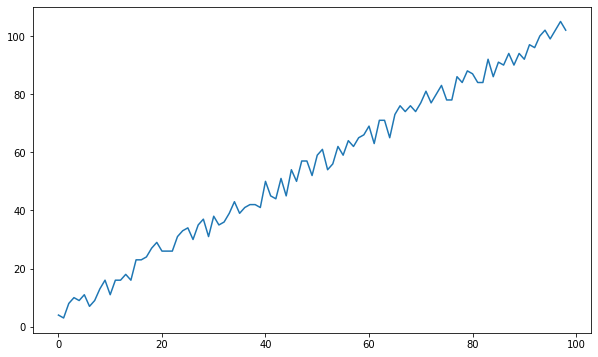

In [16]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [17]:
result = seasonal_decompose(data, model='additive', freq=1)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


In [18]:
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

[  4.   3.   8.  10.   9.  11.   7.   9.  13.  16.  11.  16.  16.  18.
  16.  23.  23.  24.  27.  29.  26.  26.  26.  31.  33.  34.  30.  35.
  37.  31.  38.  35.  36.  39.  43.  39.  41.  42.  42.  41.  50.  45.
  44.  51.  45.  54.  50.  57.  57.  52.  59.  61.  54.  56.  62.  59.
  64.  62.  65.  66.  69.  63.  71.  71.  65.  73.  76.  74.  76.  74.
  77.  81.  77.  80.  83.  78.  78.  86.  84.  88.  87.  84.  84.  92.
  86.  91.  90.  94.  90.  94.  92.  97.  96. 100. 102.  99. 102. 105.
 102.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

<Figure size 864x432 with 0 Axes>

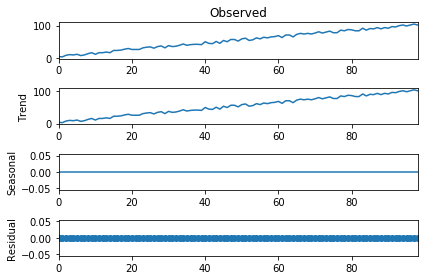

In [19]:
plt.figure(figsize=(12,6));
result.plot()
plt.show()

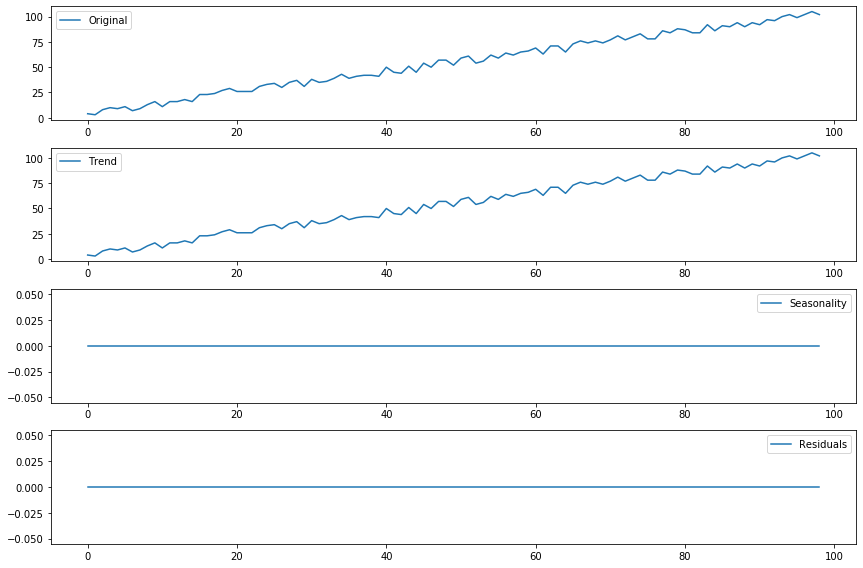

In [20]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [24]:
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


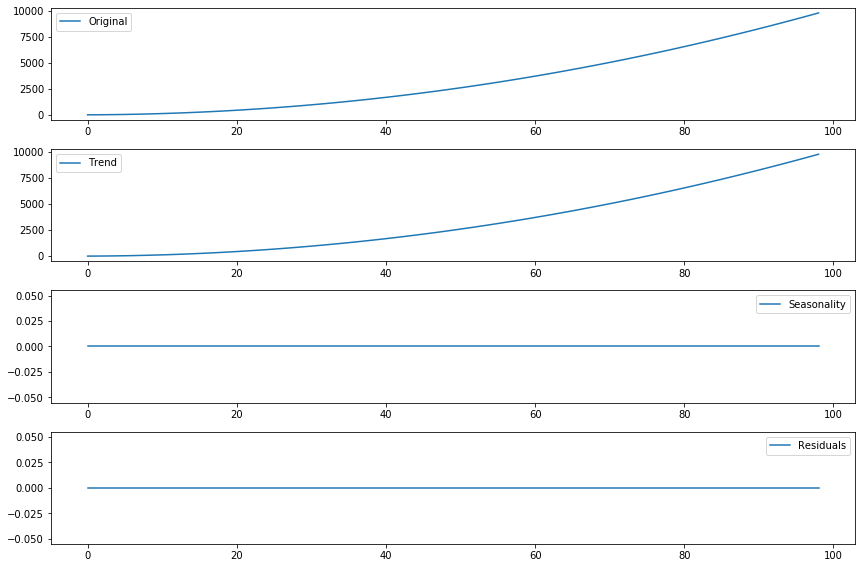

In [22]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

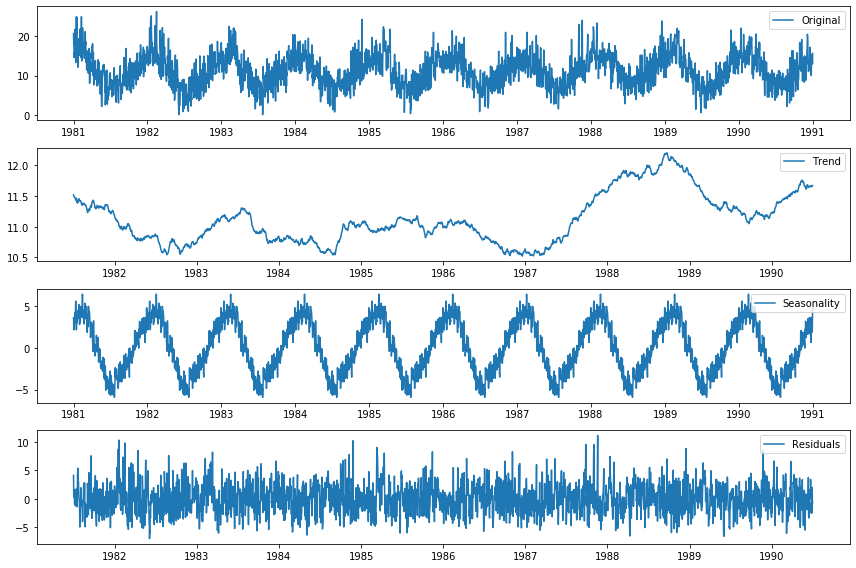

In [26]:
import pandas as pd
series = pd.read_csv('daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])
# series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# result = seasonal_decompose(series + np.min(np.abs(series))+0.00000001, model='additive', freq=365)
result = seasonal_decompose(series , model='additive', period=365)

plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

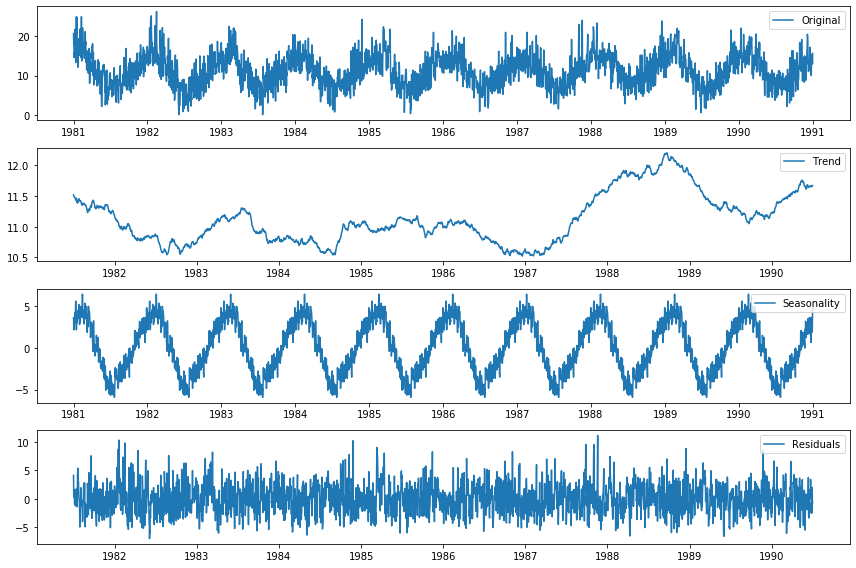

In [28]:
import pandas as pd
series = pd.read_csv('daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])
# series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# result = seasonal_decompose(series + np.min(np.abs(series))+0.00000001, model='additive', freq=365)
result = seasonal_decompose(series , model='additive', period=365)

plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# import pandas as pd
# series = pd.read_csv('daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])
# # series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# result = seasonal_decompose(series + np.min(np.abs(series))+0.00000001, model='multiplicative', freq=365)

# plt.figure(figsize=(12,8));
# plt.subplot(411)
# plt.plot(result.observed, label='Original')
# plt.legend(loc='best')
# plt.subplot(412)
# plt.plot(result.trend, label='Trend')
# plt.legend(loc='best')
# plt.subplot(413)
# plt.plot(result.seasonal,label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(414)
# plt.plot(result.resid, label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [30]:
import pandas as pd
series = pd.read_csv('international-airline-passengers.csv', index_col = 0, squeeze = True, parse_dates=['Month'])

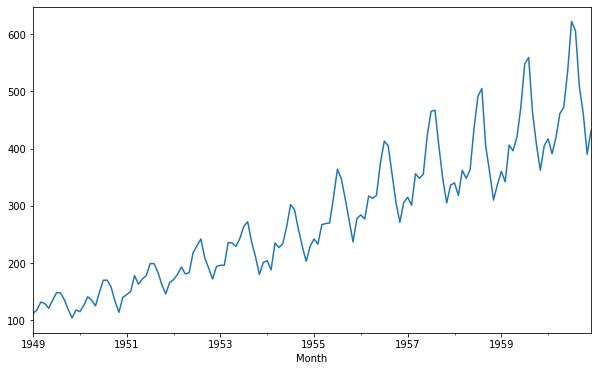

In [31]:
result = seasonal_decompose(series, model='additive')

plt.figure(figsize=(10,6));
series.plot()
plt.show()

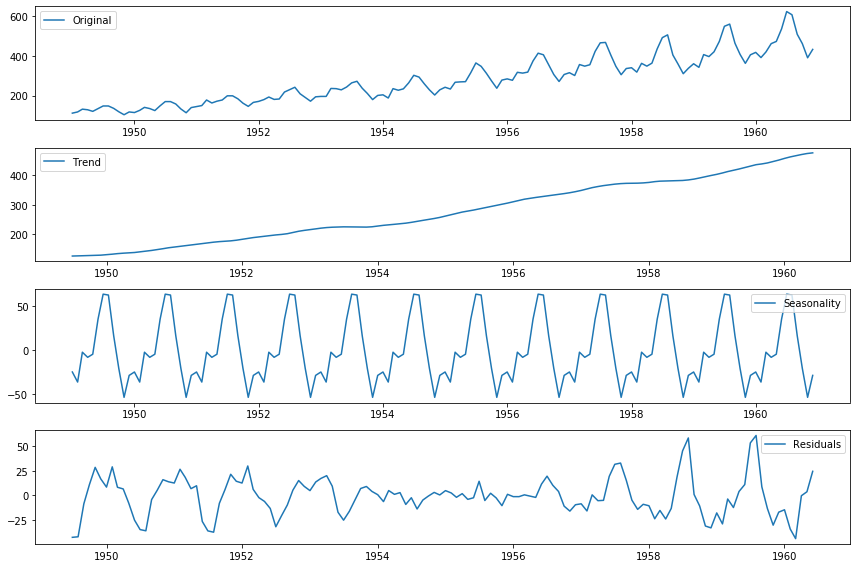

In [32]:
result = seasonal_decompose(series, model='additive')

plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [33]:
result = seasonal_decompose(series, model='multiplicative')

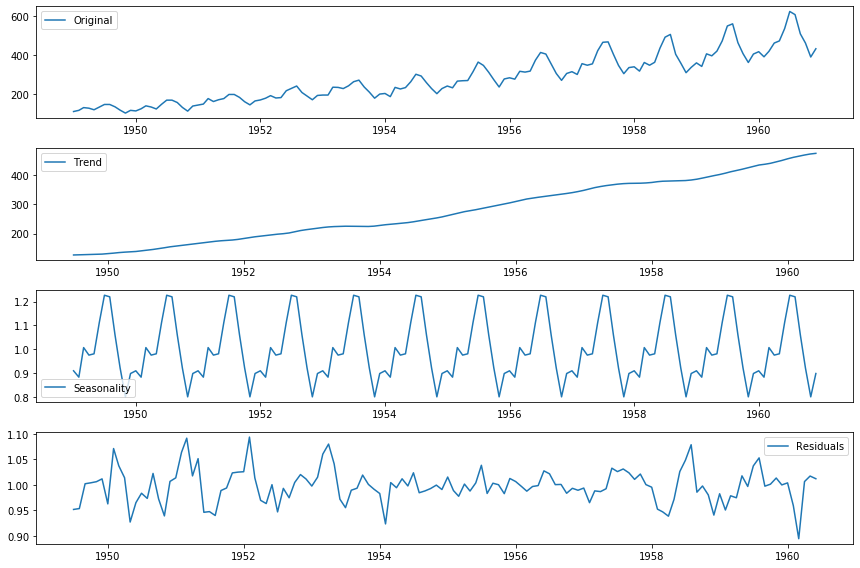

In [34]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
from pandas.plotting import autocorrelation_plot

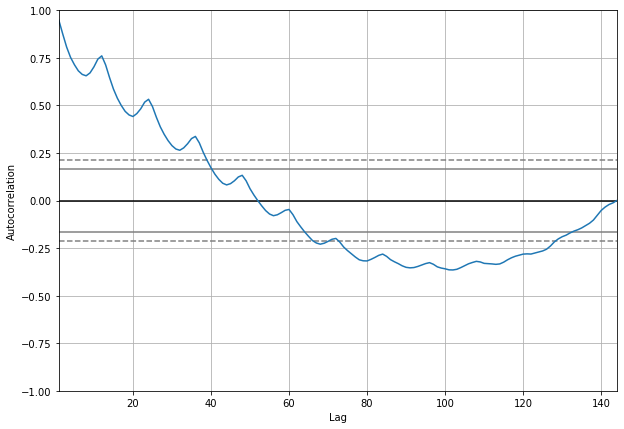

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7));
autocorrelation_plot(series)
plt.show()

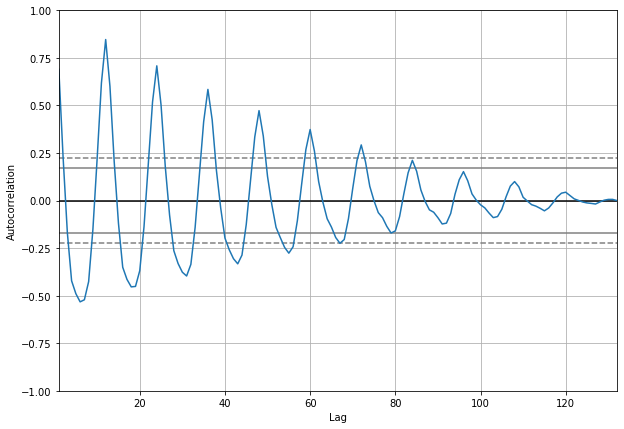

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7));
autocorrelation_plot((result.observed - result.trend).dropna())
plt.show()

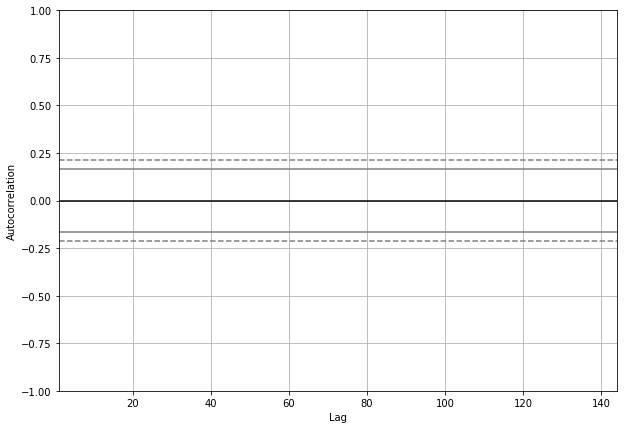

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7));
autocorrelation_plot(result.resid)
plt.show()

# res1 = result.seasonal.dropna() 
# res1 = result.resid.dropna()
# res2
# res2

In [ ]:
(result.observed - result.trend).dropna()